**Name: Mohammed Varaliya**

**Roll No: T109**

## Multiple Linear Regression

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset


In [2]:
#Reading the dataset
dataset = pd.read_csv("/content/Advertising.csv")

In [3]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Name: Mohammed Varaliya**

**Roll No: T109**

### Setting the values for independent (X) variable and dependent (Y) variable

In [4]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [5]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
len(x_train), len(y_train)

(140, 140)

### Implementing the linear model

In [6]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

**Name: Mohammed Varaliya**

**Roll No: T109**

### Model Equation

In [7]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  2.652789668879498
Coefficients:


[('TV', 0.04542559602399794),
 ('Radio', 0.18975772766893614),
 ('Newspaper', 0.004603078953112072)]

### Prediction on the test set

In [8]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
y_pred_train = mlr.predict(x_train)   # predicted value of y_train

#Predicted values
print("Prediction for test set: {}".format(y_pred_train))

Prediction for test set: [17.0749523  17.64104174 20.61333072 14.76200756  9.72606871  6.3382708
 14.49370789 11.84055785  6.67281854 14.72597658 12.55951533  8.86905905
 12.08097538 14.06463438 16.94753775 14.98475347 14.86803375  6.8674109
 18.07583331 14.34060931 10.697758   13.20252891 23.46959251 14.36959574
 15.02135739 19.14354684  6.34323696 18.36173791 16.86344389 24.20727444
  9.05176478 20.31099042 15.72941109 15.63047415 11.59698726 20.12430526
 15.34909095 14.51276293 16.20135082 12.31977912 16.35095951 16.67514329
 24.70269879 12.47633924 16.59004363  9.27228951 17.60817824 13.96710846
 13.35534976 21.3381572  15.76758783  6.49786812 10.39438846 17.39610061
 12.27284118 18.51436345  4.30088966 18.21170081 15.24453916 16.31063657
 20.66632078 21.25431926  5.90602887  8.1594241  18.21617473  9.67388661
 10.49997322 12.67237616 23.11128511 13.76683168  9.81608382  7.43551402
 11.95560443 17.68175146 15.44788754 12.15385984  9.42796818 20.59659448
  8.61511289 10.7002249  18.

**Name: Mohammed Varaliya**

**Roll No: T109**

### Linear regression for individual feature

In [9]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

slr_tv = LinearRegression()
slr_tv.fit(pd.DataFrame(x_train['TV']), y_train)

LinearRegression()

In [10]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

slr_news = LinearRegression()
slr_news.fit(pd.DataFrame(x_train['Newspaper']), y_train)

LinearRegression()

In [11]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

slr_radio = LinearRegression()
slr_radio.fit(pd.DataFrame(x_train['Radio']), y_train)

LinearRegression()

**Name: Mohammed Varaliya**

**Roll No: T109**

### Actual values and the predicted values

In [12]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741


### Evaluating the Model

In [13]:
#Model Evaluation
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

r_square = metrics.r2_score(y_test, y_pred_mlr, multioutput='variance_weighted')

print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print(f'Goodness of fit measure : {r_square}')

R squared: 89.59
Mean Absolute Error: 1.0638483124072025
Mean Square Error: 1.8506819941636963
Root Mean Square Error: 1.3603977338130553
Goodness of fit measure : 0.9058622107532246


**Name: Mohammed Varaliya**

**Roll No: T109**

### Plotting

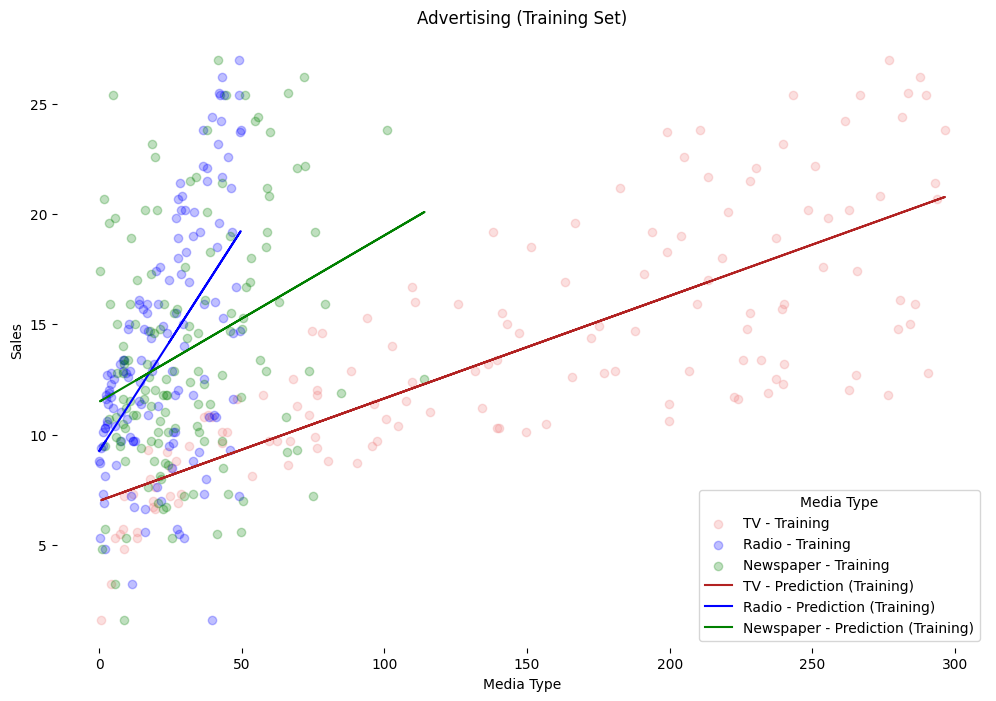

In [22]:
# Prediction on training set
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

plt.scatter(x_train['TV'], y_train, color='lightcoral', alpha=0.25, label='TV - Training')
plt.scatter(x_train['Radio'], y_train, color='blue', alpha=0.25, label='Radio - Training')
plt.scatter(x_train['Newspaper'], y_train, color='green', alpha=0.25, label='Newspaper - Training')

plt.plot(x_train['TV'], slr_tv.predict(pd.DataFrame(x_train['TV'])), color='firebrick', label='TV - Prediction (Training)')
plt.plot(x_train['Radio'], slr_radio.predict(pd.DataFrame(x_train['Radio'])), color='blue', label='Radio - Prediction (Training)')
plt.plot(x_train['Newspaper'], slr_news.predict(pd.DataFrame(x_train['Newspaper'])), color='green', label='Newspaper - Prediction (Training)')

plt.title('Advertising (Training Set)')
plt.xlabel('Media Type')
plt.ylabel('Sales')
plt.legend(['TV - Training', 'Radio - Training', 'Newspaper - Training', 'TV - Prediction (Training)', 'Radio - Prediction (Training)', 'Newspaper - Prediction (Training)'], title='Media Type', loc='best', facecolor='white')
plt.box(False)
plt.show()

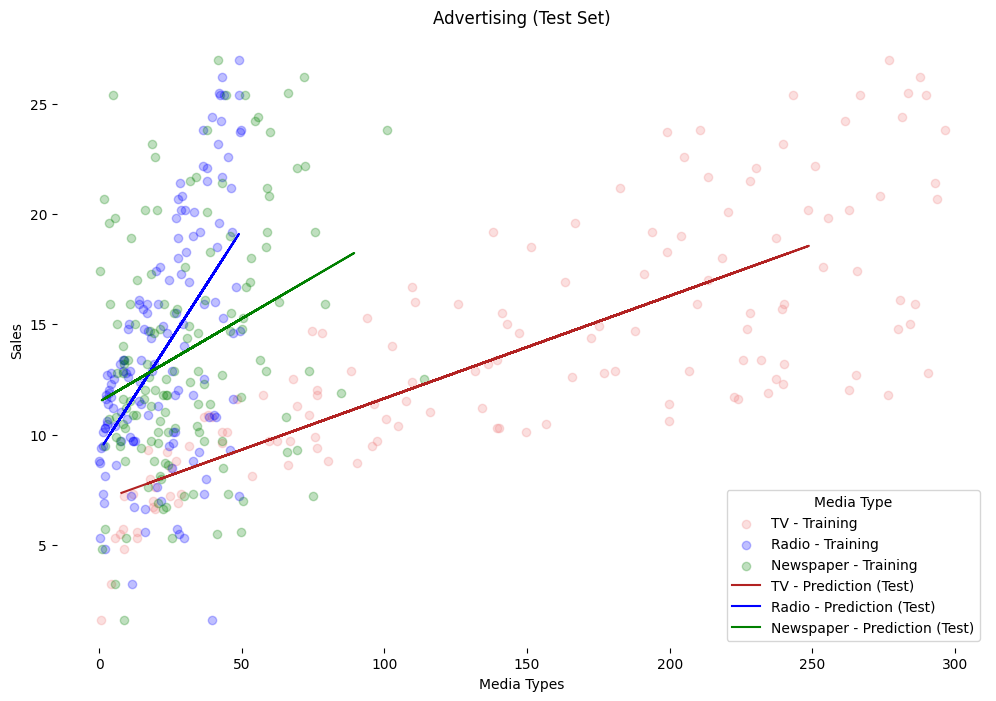

In [21]:
# Prediction on test set
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

plt.scatter(x_train['TV'], y_train, color='lightcoral', alpha=0.25, label='TV - Training')
plt.scatter(x_train['Radio'], y_train, color='blue', alpha=0.25, label='Radio - Training')
plt.scatter(x_train['Newspaper'], y_train, color='green', alpha=0.25, label='Newspaper - Training')

plt.plot(x_test['TV'], slr_tv.predict(pd.DataFrame(x_test['TV'])), color='firebrick', label='TV - Prediction (Test)')
plt.plot(x_test['Radio'], slr_radio.predict(pd.DataFrame(x_test['Radio'])), color='blue', label='Radio - Prediction (Test)')
plt.plot(x_test['Newspaper'], slr_news.predict(pd.DataFrame(x_test['Newspaper'])), color='green', label='Newspaper - Prediction (Test)')

plt.title('Advertising (Test Set)')
plt.xlabel('Media Types')
plt.ylabel('Sales')
plt.legend(['TV - Training', 'Radio - Training', 'Newspaper - Training', 'TV - Prediction (Test)', 'Radio - Prediction (Test)', 'Newspaper - Prediction (Test)'], title='Media Type', loc='best', facecolor='white')
plt.box(False)
plt.show()